Mounted at /content/drive
Coefficients: [75999.71885568 26366.04413939]
R-squared: 0.9569566472039942
Accuracy: 95.69566472039942 %


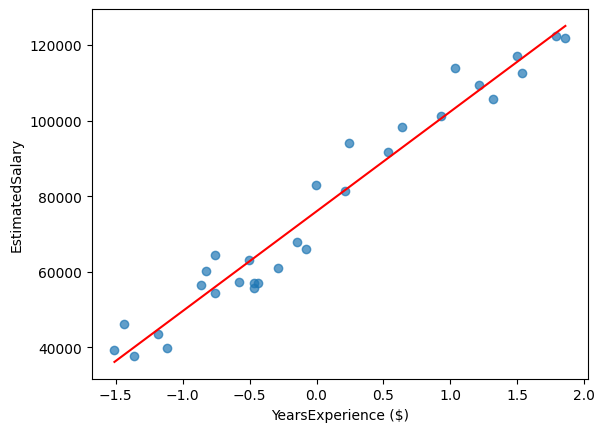

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive")

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/ML-LAB-MD/salary.csv")

# Select the feature (YearsExperience) and target (Salary) variables
X = data["YearsExperience"].values.reshape(-1, 1)
y = data["Salary"].values

X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std

# Add a column of ones to X for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Initialize the coefficients to zeros
theta = np.zeros(X.shape[1])

# Set the learning rate and number of iterations
alpha = 0.01
num_iterations = 1000

# Loop over the specified number of iterations
for i in range(num_iterations):
    # Calculate the predicted values
    y_pred = X.dot(theta)

    # Calculate the error between the predicted values and the true values
    error = y_pred - y

    # Update the coefficients using the LMS algorithm
    theta -= alpha * X.T.dot(error) / X.shape[0]

# Print the coefficients
print("Coefficients:", theta)

# Calculate R-squared
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print("R-squared:", r_squared)

# Calculate accuracy in percentage
accuracy = r_squared * 100
print("Accuracy:", accuracy, "%")

# Plot the data points and the line of best fit
plt.scatter(X[:, 1], y, alpha=0.7)
plt.plot(X[:, 1], X.dot(theta), color='red')
plt.xlabel("YearsExperience ($)")
plt.ylabel("EstimatedSalary")
plt.show()
